# ${}^{4}{\rm He}$

The interaction is defined in `helium4plusplus.py`. It is nonlocal, and so is the counterterm. 

We will use it to perturbatviely calculate NLO phase shifts.

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import scienceplots
from tqdm import tqdm

import mu2

import helium4plusplus as he4

plt.style.use('science')

In [2]:
ELL = 0

rg_flow = np.loadtxt('datfiles/rgflow_gLO_gNLO_perturbative_nonlocal_2_6_6.dat')

In [3]:
momenta = np.linspace(0.01/he4.BETA6, 0.3/he4.BETA6, 30)
# X = he4.FACTOR * he4.BETA6 # K•Å^3

In [4]:
R, glo, gnlo = rg_flow[0]
s = he4.NonlocalHelium4System2(R, ELL, 2, 6, 6, nq=200)

In [5]:
s.a0_and_r0_pert1_fast(glo, gnlo, momenta)

(99.99999998149116, 7.3331514356964815)

In [6]:
phase_shifts = []

for (R, glo, gnlo) in tqdm(rg_flow):
    s = he4.NonlocalHelium4System2(R, ELL, 2, 6, 6, nq=200)
    kcd = s.kcotd_gen_pert1_fast(momenta, glo, gnlo)
    phase_shifts.append(np.arctan(momenta/kcd))

100%|███████████████████████████████████████████| 38/38 [01:03<00:00,  1.67s/it]


In [7]:
phase_shifts = np.array(phase_shifts)

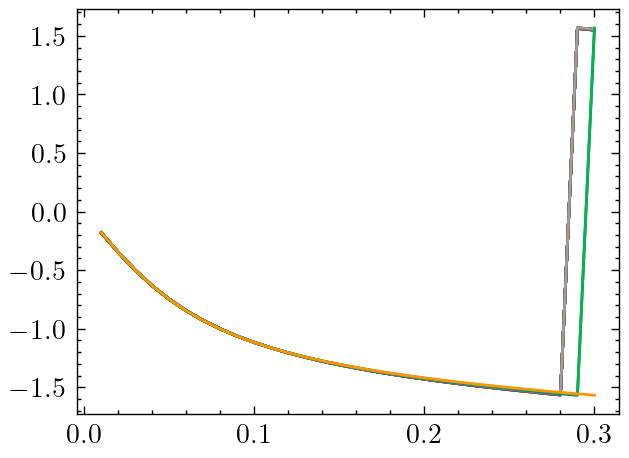

In [10]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.plot(momenta*he4.BETA6, phase_shifts.T);

In [11]:
phase_shifts.shape

(38, 30)

In [12]:
np.savetxt('datfiles/nonlocal2_phase_shifts.txt', np.vstack((momenta, phase_shifts)).T)